### Importing libraries and dataset 

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

# import the data in undirected graph format
coauthor_graph = nx.read_edgelist('Q12.txt')

# removing selfloops from graph making the graph simple
coauthor_graph.remove_edges_from(nx.selfloop_edges(coauthor_graph))

### Coathor utility function

In [5]:
def coauthor_utility_func(n, m, graph):
    return (1/graph.degree(n)) + (1/graph.degree(m)) + (1/(graph.degree(n) * graph.degree(m)))

### Finding utility value for all nodes

In [7]:
def find_node_utility(n, graph):
    node_utility = 0
    for m in graph.neighbors(n):
        node_utility = node_utility + coauthor_utility_func(n, m, graph)
    return node_utility

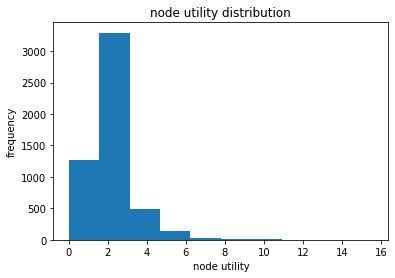

In [8]:
# for each node, find node utility with the aforementioned functions
nodes_utilities = []
for n in coauthor_graph.nodes:
    node_utility = find_node_utility(n, coauthor_graph)
    nodes_utilities.append(node_utility)
    
# Visualizing node utility distribution
plt.hist(nodes_utilities)
plt.xlabel("node utility")
plt.ylabel("frequency")
plt.title("node utility distribution")
plt.show()

In [9]:
sum_of_all_nodes_utilities = sum(nodes_utilities)
sum_of_all_nodes_utilities_efficient = 3 * len(coauthor_graph.nodes)
ratio = sum_of_all_nodes_utilities / sum_of_all_nodes_utilities_efficient
print("sum of node's utility in graph to efficient one = " + str(round(ratio,2)))

sum of node's utility in graph to efficient one = 0.76


### Degree distribution for nodes

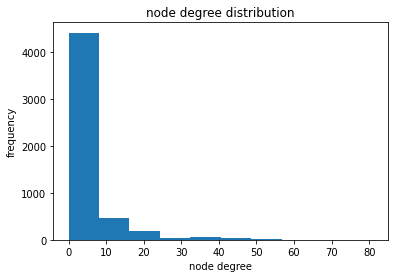

In [10]:
def plot_degree_dist(G):
    degrees = [G.degree(n) for n in G.nodes()]
    plt.hist(degrees)
    plt.xlabel("node degree")
    plt.ylabel("frequency")
    plt.title("node degree distribution")
    plt.show()

plot_degree_dist(coauthor_graph)

### Max node's neighbor degree distribution

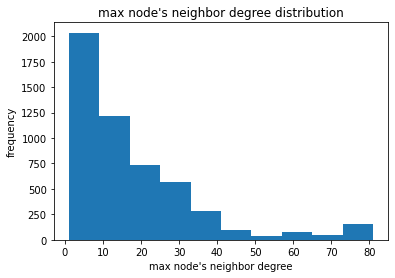

In [11]:
nodes_neighbors_most_degree = []

# for each node we save its neighbors in a list. then we run throught each of them and
# save their degrees in a list. then we find max of degrees.
for node in coauthor_graph:
    list_of_neighbors = [n for n in coauthor_graph.neighbors(node)]
    list_of_neighbors_degrees = [coauthor_graph.degree(n) for n in list_of_neighbors]
    if len(list_of_neighbors_degrees) != 0:
        nodes_neighbors_most_degree.append(max(list_of_neighbors_degrees))
    else:
        continue
    
plt.hist(nodes_neighbors_most_degree)
plt.xlabel("max node's neighbor degree")
plt.ylabel("frequency")
plt.title("max node's neighbor degree distribution")
plt.show()

### Number of stable edges

In [ ]:
def is_edge_stable(edge, graph):
    n = edge[0]
    m = edge[1]
    n_prev_utility = find_node_utility(n, graph)
    m_prev_utility = find_node_utility(m, graph)
    graph_prime = graph.copy()
    graph_prime.remove_edge(n, m)
    n_new_utility = find_node_utility(n, graph_prime)
    m_new_utility = find_node_utility(m, graph_prime)
    return 0 if (n_new_utility > n_prev_utility) and (m_new_utility > m_prev_utility) else 1

In [ ]:
stable_edges = 0

for e in coauthor_graph.edges:
    stable_edges = stable_edges + is_edge_stable(e, coauthor_graph)

print("Number of stable edges = "+ str(stable_edges))

### Fraction of welcome edges

In [ ]:
def is_edge_welcome(edge, graph):
    n = edge[0]
    m = edge[1]
    n_prev_utility = find_node_utility(n, graph)
    m_prev_utility = find_node_utility(m, graph)
    graph_prime = graph.copy()
    graph_prime.add_edge(n, m)
    n_new_utility = find_node_utility(n, graph_prime)
    m_new_utility = find_node_utility(m, graph_prime)
    return 1 if ((n_new_utility > n_prev_utility) and (m_new_utility >= m_prev_utility) or
                 (n_new_utility >= n_prev_utility) and (m_new_utility > m_prev_utility)) else 0

In [ ]:
welcome_edges = 0

for e in nx.non_edges(coauthor_graph):
    welcome_edges = welcome_edges + is_edge_welcome(e, coauthor_graph)

print("fraction of welcome edges = "+ str(welcome_edges/coauthor_graph.number_of_edges()))